### Load and Prepare the Data

In [56]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from minisom import MiniSom

data = pd.read_csv('winequality-red.csv', delimiter=';')

X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Scores

data.head()



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Answer 1A

In [57]:

# Load the dataset
data1 = pd.read_csv('winequality-red.csv', delimiter=';')
data1['wine type'] = 'R'
data1['wine'] = 'Red'

data2 = pd.read_csv('winequality-white.csv', delimiter=';')
data2['wine type'] = 'W'
data2['wine'] = 'White'

df = pd.concat([data1, data2], ignore_index=True)

X = df.iloc[1:, :-3]  # Features
Y = df.iloc[:, -2]   # Wine Type

X = X.to_dict(orient='split')
X = X['data']
print(X)

Y = Y.to_dict()
Y = np.array(list(Y.values()))
print(Y)

[[7.8, 0.88, 0.0, 2.6, 0.098, 25.0, 67.0, 0.9968, 3.2, 0.68, 9.8], [7.8, 0.76, 0.04, 2.3, 0.092, 15.0, 54.0, 0.997, 3.26, 0.65, 9.8], [11.2, 0.28, 0.56, 1.9, 0.075, 17.0, 60.0, 0.998, 3.16, 0.58, 9.8], [7.4, 0.7, 0.0, 1.9, 0.076, 11.0, 34.0, 0.9978, 3.51, 0.56, 9.4], [7.4, 0.66, 0.0, 1.8, 0.075, 13.0, 40.0, 0.9978, 3.51, 0.56, 9.4], [7.9, 0.6, 0.06, 1.6, 0.069, 15.0, 59.0, 0.9964, 3.3, 0.46, 9.4], [7.3, 0.65, 0.0, 1.2, 0.065, 15.0, 21.0, 0.9946, 3.39, 0.47, 10.0], [7.8, 0.58, 0.02, 2.0, 0.073, 9.0, 18.0, 0.9968, 3.36, 0.57, 9.5], [7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5], [6.7, 0.58, 0.08, 1.8, 0.097, 15.0, 65.0, 0.9959, 3.28, 0.54, 9.2], [7.5, 0.5, 0.36, 6.1, 0.071, 17.0, 102.0, 0.9978, 3.35, 0.8, 10.5], [5.6, 0.615, 0.0, 1.6, 0.089, 16.0, 59.0, 0.9943, 3.58, 0.52, 9.9], [7.8, 0.61, 0.29, 1.6, 0.114, 9.0, 29.0, 0.9974, 3.26, 1.56, 9.1], [8.9, 0.62, 0.18, 3.8, 0.176, 52.0, 145.0, 0.9986, 3.16, 0.88, 9.2], [8.9, 0.62, 0.19, 3.9, 0.17, 51.0, 148.0, 0.9986, 3.17, 

/Users/bijo/anaconda3/lib/python3.11/site-packages/minisom.py:388: ComplexWarning: Casting complex values to real discards the imaginary part
  self._weights[i, j] = c1*pc[pc_order[0]] + \


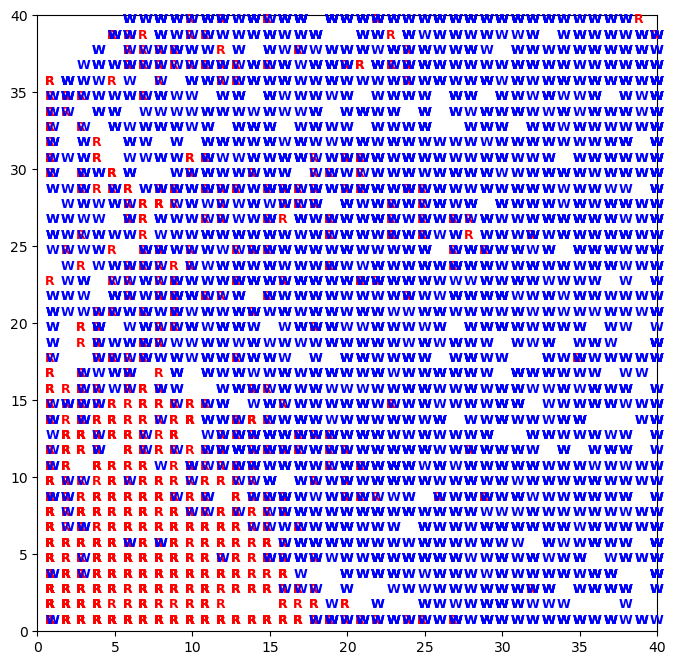

In [3]:
som = MiniSom(40, 40, 11, sigma=4,
              learning_rate=0.5, neighborhood_function='gaussian')

som.pca_weights_init(X)

# random training
som.train(X, 7000, random_order=True) 

label_to_color = {'R': 'red', 'W': 'blue'}

# Visualising SOM results
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(X, Y):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    color = label_to_color.get(t, 'black')
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=color, fontdict={'weight': 'bold',  'size': 9})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()

### Answer 1B 

##### Experiment 1

**Red Wine**

In [86]:
df = data1.drop(['wine type'], axis = 1)

df = df[['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 
         'residual sugar', 'chlorides', 'free sulfur dioxide', 
         'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']]

fig = px.parallel_coordinates(df, color="quality", labels={
        'quality': 'Quality', 'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide',
        'total sulfur dioxide': 'Total Sulfur Dioxide', 'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates',
        'alcohol': 'Alcohol'},
        color_continuous_scale=px.colors.sequential.Plasma, template = 'plotly_dark', height = 600)

fig.update_layout(
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"
    ),
    paper_bgcolor='rgb(30, 30, 30)',
    plot_bgcolor='rgb(30, 30, 30)',
    title = 'Quality by 11 Physiochemical Properties',
    margin=dict(t=150),
    title_x=0
)


fig.show()
#fig.write_html("file.html")

In [76]:
df = data1.drop(['wine type'], axis = 1)


fig = px.parallel_coordinates(df, color="quality", labels={
        'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide',
        'total sulfur dioxide': 'Total Sulfur Dioxide', 'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates',
        'alcohol': 'Alcohol', 'quality': 'Quality'},
        color_continuous_scale=px.colors.sequential.Plasma, template='plotly_dark', height = 600)

fig.update_layout(
    font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"
    ),
    title_font=dict(
        family="Arial, sans-serif",
        size=14,
        color="white"
    ),
    paper_bgcolor='rgb(30, 30, 30)',
    plot_bgcolor='rgb(30, 30, 30)',
    title = 'Quality by 11 Physiochemical Properties',
    margin=dict(t=150),
    title_x=0
)


fig.show()
#fig.write_html("file.html")

**White Wine**

In [64]:
df = data2.drop(['wine type'], axis = 1)

fig = px.parallel_coordinates(df, color="quality", labels={
        'fixed acidity': 'Fixed Acidity', 'volatile acidity': 'Volatile Acidity', 'citric acid': 'Citric Acid',
        'residual sugar': 'Residual Sugar', 'chlorides': 'Chlorides', 'free sulfur dioxide': 'Free Sulfur Dioxide',
        'total sulfur dioxide': 'Total Sulfur Dioxide', 'density': 'Density', 'pH': 'pH', 'sulphates': 'Sulphates',
        'alcohol': 'Alcohol', 'quality': 'Quality'},
        color_continuous_scale=px.colors.sequential.Plasma, template='plotly_dark')

fig.show()

In [78]:
import plotly.graph_objects as go



quality_levels = sorted(df['quality'].unique())

# Create frames for each quality level
frames = []
for quality_level in quality_levels:
    subset_df = df[df['quality'] == quality_level]
    fig = go.Figure(data=go.Parcoords(line=dict(color=subset_df['quality'], colorscale='Plasma'),
                                       dimensions=[dict(range=[0, 10], label='Quality')] +
                                                   [dict(range=[subset_df[col].min(), subset_df[col].max()],
                                                         label=col.title(), values=subset_df[col]) for col in df.columns[:-1]]))
    frames.append(go.Frame(data=fig.data, name=str(quality_level), layout=fig.layout))

# Create the animation
animation = go.Figure(frames=frames)

# Update layout
animation.update_layout(title_text="Quality by 11 Physiochemical Properties",
                        font=dict(family="Arial, sans-serif", size=14, color="white"),
                        title_font=dict(family="Arial, sans-serif", size=14, color="white"),
                        paper_bgcolor='rgb(30, 30, 30)',
                        plot_bgcolor='rgb(30, 30, 30)',
                        margin=dict(t=150),
                        title_x=0)

# Show the animation
animation.show()


ValueError: 
    Invalid value of type 'builtins.str' received for the 'range[0]' property of parcoords.dimension
        Received value: 'Red'

    The 'range[0]' property is a number and may be specified as:
      - An int or float

In [72]:
n_bin = 3

df = data1

df['fixed acidity bins'] = pd.cut(df['fixed acidity'], bins=n_bin)
df['volatile acidity bins'] = pd.cut(df['volatile acidity'], bins=n_bin)
df['citric acid bins'] = pd.cut(df['citric acid'], bins=n_bin)
df['residual sugar bins'] = pd.cut(df['residual sugar'], bins=n_bin)
df['chlorides bins'] = pd.cut(df['chlorides'], bins=n_bin)
df['free sulfur dioxide bins'] = pd.cut(df['free sulfur dioxide'], bins=n_bin)
df['total sulfur dioxide bins'] = pd.cut(df['total sulfur dioxide'], bins=n_bin)
df['density bins'] = pd.cut(df['density'], bins=n_bin)
df['pH bins'] = pd.cut(df['pH'], bins=n_bin)
df['sulphates bins'] = pd.cut(df['sulphates'], bins=n_bin)
df['alcohol bins'] = pd.cut(df['alcohol'], bins=n_bin)


df2 = df[['fixed acidity bins', 'volatile acidity bins', 'citric acid bins', 'residual sugar bins', 'chlorides bins', 'free sulfur dioxide bins', 'total sulfur dioxide bins', 'density bins', 'pH bins', 'sulphates bins', 'alcohol bins', 'quality']]

columns_to_convert = ['fixed acidity bins', 'volatile acidity bins', 'citric acid bins', 'residual sugar bins', 'chlorides bins', 'free sulfur dioxide bins', 'total sulfur dioxide bins', 'density bins', 'pH bins', 'sulphates bins', 'alcohol bins']

for column in columns_to_convert:
    df2.loc[:, column] = df2[column].astype(str)


fig = px.parallel_categories(df2, dimensions=['fixed acidity bins', 'volatile acidity bins', 'citric acid bins', 'residual sugar bins', 'chlorides bins', 'free sulfur dioxide bins', 'total sulfur dioxide bins', 'density bins', 'pH bins', 'sulphates bins', 'alcohol bins', 'quality'],
                color="quality", color_continuous_scale=px.colors.sequential.Plasma)
fig.show()
